# Applying a *linear* regression to NFL field goal data

### 0. Import required modules

In [285]:
import pandas as pd #import pandas library for data manipulation (https://pandas.pydata.org/)
import numpy as np #import the 'NumPy' module for scientific computing with Python (https://numpy.org/)
import plotly.express as px
import statistics as st
import math

In [286]:
%run -i 'SportsAnalytics.py' #source required functions for building a logistic regression and plotting the results

### 1. Read data as pandas dataframe
*see [1. Reading in files using pandas (.csv, .xls, .json)](01_read_files.ipynb)*

In [287]:
fg_df = pd.read_excel('field_goal_predict_df.xlsx', index_col=0) #read in 'field_goal_predict_df.xlsx' file using pandas read_excel function as new dataframe 'field_goal_predict_df'
fg_df.head() #display the head (first 5 rows) of field_goal_predict_df

,gid,pid,fgxp,dist,make,season,postseason,away,stadium,temp,humidity,wind-spd,cond,surface,player id,player,make-prediction,make-vs-prediction
0,3189,518667,FG,33,1,2012,0,1,MetLife Stadium,77,63,5,Fair,FieldTurf,DB-0200,Dan Bailey,0.94,0.06
1,3207,521630,FG,33,1,2012,0,1,Ralph Wilson Stadium,66,55,11,Mostly Sunny,A Turf Titan,RS-3400,Ryan Succop,0.94,0.06
2,3214,522794,FG,33,1,2012,0,0,Edward Jones Dome,-999,-999,-999,Dome,AstroTurf,GZ-2000,Greg Zuerlein,0.94,0.06
3,3226,524757,FG,33,1,2012,0,1,Sun Life Stadium,83,76,4,Mostly Cloudy,Grass,NF-0300,Nick Folk,0.94,0.06
4,3226,524888,FG,33,1,2012,0,1,Sun Life Stadium,83,76,4,Mostly Cloudy,Grass,NF-0300,Nick Folk,0.94,0.06


### 2. Split data into train and test dataframes
*see section 5 in [3. Manipulating pandas dataframes](03_manipulate_data.ipynb)*

In [288]:
#--- subset data into train and test dataframes by season < 2016
fg_train_df = fg_df[fg_df['season'] < 2016]
fg_test_df = fg_df[fg_df['season'] >= 2016]

### 3. Reformatting pandas dataframe for linear regression
*see section 5 in [3. Manipulating pandas dataframes](03_manipulate_data.ipynb)*

In [289]:
#--- remove rows where wind speed is NULL (-999)
fg_train_linear_df = fg_train_df[fg_train_df['wind-spd'] > -999]
fg_train_linear_df.head()

,gid,pid,fgxp,dist,make,season,postseason,away,stadium,temp,humidity,wind-spd,cond,surface,player id,player,make-prediction,make-vs-prediction
0,3189,518667,FG,33,1,2012,0,1,MetLife Stadium,77,63,5,Fair,FieldTurf,DB-0200,Dan Bailey,0.94,0.06
1,3207,521630,FG,33,1,2012,0,1,Ralph Wilson Stadium,66,55,11,Mostly Sunny,A Turf Titan,RS-3400,Ryan Succop,0.94,0.06
3,3226,524757,FG,33,1,2012,0,1,Sun Life Stadium,83,76,4,Mostly Cloudy,Grass,NF-0300,Nick Folk,0.94,0.06
4,3226,524888,FG,33,1,2012,0,1,Sun Life Stadium,83,76,4,Mostly Cloudy,Grass,NF-0300,Nick Folk,0.94,0.06
6,3290,535594,FG,33,1,2012,0,0,Oakland-Alameda County Coliseum,62,49,11,Partly Cloudy,Grass,SJ-0300,Sebastian Janikowski,0.94,0.06


### 4. Fitting a linear regression
*see [5. Modelling data using linear regression](05_linear_regression.ipynb)* 

In [290]:
#--- Use the LinearRegTrain() function from 'SportsAnalytics.py' to build a logistic regression model
model = LinearRegTrain(X = fg_train_linear_df['wind-spd'], Y = fg_train_linear_df['make-vs-prediction'])

                     const wind-spd
make-vs-prediction                 
Coefficients          0.02    -0.00
Std error             0.01     0.00
p-value               0.13     0.03
Log-likelihood     -722.91         
Number valid obs   2387.00         
Total obs          2389.00         


In [291]:
#--- Find the min and max values of x
min_x = min(fg_train_linear_df['wind-spd'])
max_x = max(fg_train_linear_df['wind-spd'])

#--- Use the Binned_stats() function from 'SportsAnalytics.py' to aggregate y for buckets/bins of x
binned_stats = Binned_stats(
    buckets = range(min_x, max_x), 
    col1 = fg_train_linear_df['wind-spd'], 
    col2 = fg_train_linear_df['make-vs-prediction'])
binned_stats.head()

,Bins,Count,Avg wind-spd,Avg make-vs-prediction,Stderr make-vs-prediction
0,"[0,1)",88,0.00,0.04,0.06
1,"[1,2)",45,1.00,0.07,0.07
2,"[2,3)",91,2.00,0.03,0.06
3,"[3,4)",111,3.00,0.02,0.05
4,"[4,5)",142,4.00,-0.01,0.05


### 5. Plotting the linear regression

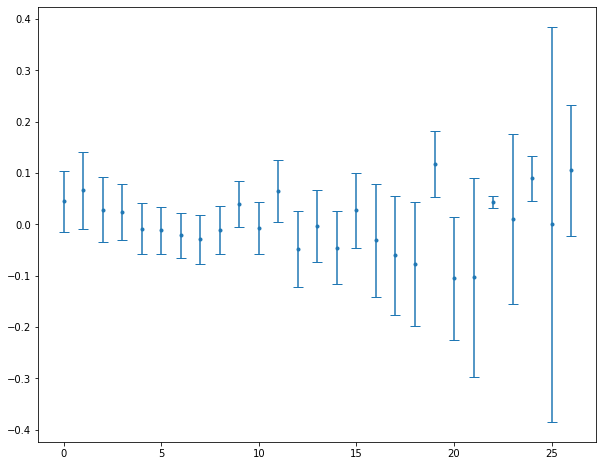

In [292]:
#--- Use the Graph_Binned_stats() function from 'SportsAnalytics.py' to plot binned stats
Graph_Binned_stats(binned_stats)

In [293]:
#--- Use the LinearRegPredict() function from 'SportsAnalytics.py' to predict values of y with known values of x
model_predict = LinearRegPredict(model, X = range(min_x, max_x+1))

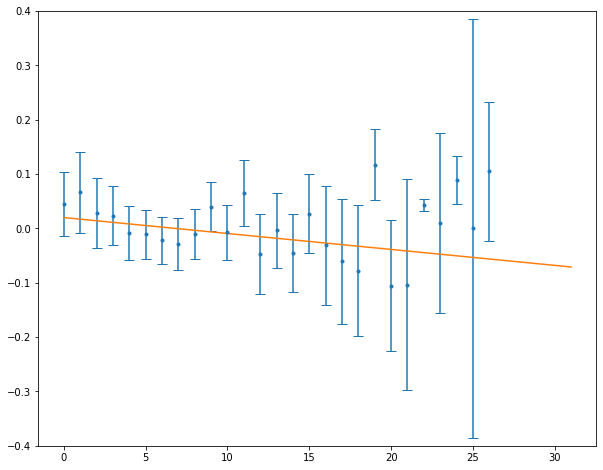

In [294]:
#--- Use the Graph_Binned_stats_with_prediction() function from 'SportsAnalytics.py' to plot binned stats with an overlay of the logistic model
Graph_Binned_stats_with_prediction(
    binned_stats, 
    lineX = model_predict['wind-spd'], 
    lineY = model_predict['prediction'], 
    linestyle = 1,
    ylims = [-0.4, 0.4])

### 6. Model validation with test dataset

In [295]:
#--- create df for continuous linear predictions 
fg_test_linear_df = pd.merge(
    fg_test_df, 
    model_predict.rename(columns={'prediction':'wind-make-adjustment'}), 
    on='wind-spd')
fg_test_linear_df['model'] = 'linear'

In [296]:
#--- create df for standard baseline predictions
fg_test_baseline_df = fg_test_df.copy()
fg_test_baseline_df['wind-make-adjustment'] = 0
fg_test_baseline_df['model'] = 'no model'

In [297]:
#--- bind the 5 varied model predictions togteher 
all_models = pd.concat([fg_test_linear_df, fg_test_baseline_df])

#create erorr variable for each prediction (actual-prediction)
all_models['error'] = all_models['make']-(all_models['make-prediction']+all_models['wind-make-adjustment'])

In [298]:
#--- create functions for MAE, MSE and RMSE validation metrics
def mae(x):
    res = abs(x).mean() 
    return res

def mse(x):
    res = np.square(x).mean() 
    return res
    
def rmse(x):
    res = math.sqrt(np.square(x).mean())
    return res

def mean_perc(x):
    res = x.mean()*100
    return res

In [299]:
#--- apply model validation functions to each model 
model_results = (
    all_models.groupby(['model'], as_index=False)
    .agg(
        # Get mean erorr for each model type
        me = pd.NamedAgg(column = 'error', aggfunc = 'mean'),
        # Get mean abs erorr for each model type
        mae = pd.NamedAgg(column = 'error', aggfunc = mae),
        # Get mean square erorr for each model type
        mse = pd.NamedAgg(column = 'error', aggfunc = mse),
        # Get mean square erorr for each model type
        rmse = pd.NamedAgg(column = 'error', aggfunc = rmse)
    )
    .sort_values('rmse', ascending=True))

model_results

,model,me,mae,mse,rmse
0,linear,-0.01,0.21,0.10,0.32
1,no model,-0.00,0.21,0.11,0.33


#### Results of model validation...  
This result tells us that the linear model predictions have an average absolute erorr of 21% from the actual results.  
This is the same mean absolute error (to 2 decimal places) as having no model.  
BUT there is value of having the linear model when you look at the mean-square-error and root-mean-square-error which is 1% closer to actual results than the no model predictions. 

### 7. Apply logistic regression to orginal dataset 
*see section 4 in [3. Manipulating pandas dataframes](03_manipulate_data.ipynb)*

In [300]:
fg_predict_adj_df = fg_df.merge(model_predict.rename(columns={'prediction':'make-vs-prediction-adjustment'}), on='wind-spd')
fg_predict_adj_df['new-make-vs-prediction'] = fg_predict_adj_df['make-vs-prediction']-fg_predict_adj_df['make-vs-prediction-adjustment']
fg_predict_adj_df.head()

,gid,pid,fgxp,dist,make,season,postseason,away,stadium,temp,humidity,wind-spd,cond,surface,player id,player,make-prediction,make-vs-prediction,make-vs-prediction-adjustment,new-make-vs-prediction
0,3189,518667,FG,33,1,2012,0,1,MetLife Stadium,77,63,5,Fair,FieldTurf,DB-0200,Dan Bailey,0.94,0.06,0.01,0.05
1,3305,538094,FG,33,1,2012,0,0,Sports Authority Field at Mile High,59,30,5,Partly Cloudy,Grass,MP-2100,Matt Prater,0.94,0.06,0.01,0.05
2,3305,538156,FG,33,1,2012,0,0,Sports Authority Field at Mile High,59,30,5,Partly Cloudy,Grass,MP-2100,Matt Prater,0.94,0.06,0.01,0.05
3,3649,595881,FG,33,1,2013,0,0,Gillette Stadium,30,46,5,Cloudy,FieldTurf,SG-0800,Stephen Gostkowski,0.94,0.06,0.01,0.05
4,3862,631421,FG,33,1,2014,0,1,Raymond James Stadium,64,73,5,Cloudy,Grass,MB-4600,Matt Bryant,0.94,0.06,0.01,0.05


### 8. Aggregate results of linear regression predictions

In this section we are going to take the application of the logisitic regression model and use it to answer a number of questions...  
1. Who are the best and worst kickers? 
2. Which kicker has had the most successful season?
3. Which stadium is the toughest to kick a field goal in? 
4. Which surfaces are the easiest and toughest to kick a field goal on?
5. Does home advantage exist for kicking field goals?  

*see section 9 in [3. Manipulating pandas dataframes](03_manipulate_data.ipynb)*

In [301]:
#--- aggregate the data to calculate each kicker's expected field goals vs. actual for all seasons

total_player_fg_success = (
    fg_predict_adj_df.groupby(['player', 'player id'], as_index=False)
    .agg(
        # Get the number of field goal attempts
        total_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = 'count'),
        # Get the predicted number of successful attempts
        predicted_successful_fg = pd.NamedAgg(column = 'make-prediction', aggfunc = 'sum'),
        # Get the actual number of successful kicks
        successful_fg = pd.NamedAgg(column = 'make', aggfunc = 'sum'),
        # Get the difference between actual and predicted success
        vs_prediction_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = 'sum'))
    .sort_values('vs_prediction_fg', ascending=False))

total_player_fg_success.head()

,player,player id,total_fg,predicted_successful_fg,successful_fg,vs_prediction_fg
17,Justin Tucker,JT-3950,178,150.77,159,8.23
31,Steven Hauschka,SH-0400,140,124.25,131,6.75
25,Phil Dawson,PD-0200,132,114.87,120,5.13
15,Josh Brown,JB-7100,94,83.03,87,3.97
30,Stephen Gostkowski,SG-0800,174,152.66,156,3.34


In [302]:
#--- aggregate the data to calculate each kicker's expected field goal % vs. actual % for all seasons

avg_player_fg_success = (
    fg_predict_adj_df.groupby(['player', 'player id'], as_index=False)
    .agg(
        # Get the number of field goal attempts
        total_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = 'count'),
        # Get the predicted number of successful attempts
        avg_predicted_successful_fg = pd.NamedAgg(column = 'make-prediction', aggfunc = mean_perc),
        # Get the actual number of successful kicks
        avg_successful_fg = pd.NamedAgg(column = 'make', aggfunc = mean_perc),
        # Get the difference between actual and predicted success
        avg_vs_prediction_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = mean_perc))
    .sort_values('avg_vs_prediction_fg', ascending=False))

In [303]:
avg_player_fg_success.head() #show the 5 best kickers according to actual vs predicted % kick success

,player,player id,total_fg,avg_predicted_successful_fg,avg_successful_fg,avg_vs_prediction_fg
31,Steven Hauschka,SH-0400,140,88.75,93.57,4.82
17,Justin Tucker,JT-3950,178,84.70,89.33,4.63
15,Josh Brown,JB-7100,94,88.33,92.55,4.23
25,Phil Dawson,PD-0200,132,87.02,90.91,3.88
9,Dan Bailey,DB-0200,64,83.81,87.50,3.69


#### After accounting for wind speeds, Steven Hauschka overtakes Justin Tucker as the most successful kicker, with a relative kick success rate of +4.82%.  
This means that he has kicked 4.82% more field goals than expected (given the distance and wind speeds of each kick).

In [304]:
avg_player_fg_success.tail() #show the 5 worst kickers according to actual vs predicted % kick success

,player,player id,total_fg,avg_predicted_successful_fg,avg_successful_fg,avg_vs_prediction_fg
1,Blair Walsh,BW-0350,87,86.29,81.61,-4.69
16,Josh Lambo,JL-0207,56,85.74,80.36,-5.38
22,Mike Nugent,MN-0800,127,86.85,81.10,-5.75
4,Caleb Sturgis,CS-4250,121,86.60,79.34,-7.26
13,Greg Zuerlein,GZ-2000,69,81.29,72.46,-8.82


#### After accounting for wind speeds, Caleb Sturgis climbs above Greg Zuerlein, who falls is least successful kicker with a relative kick success rate of -8.82% .  
This means that he has kicked 8.82% less field goals than expected (given the distance and wind speeds of each kick).

In [305]:
#--- aggregate the data to calculate each kicker's expected field goal % vs. actual % for each season

avg_player_season_fg_success = (
    fg_predict_adj_df.groupby(['player', 'player id', 'season'], as_index=False)
    .agg(
        # Get the number of field goal attempts
        total_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = 'count'),
        # Get the predicted number of successful attempts
        avg_predicted_successful_fg = pd.NamedAgg(column = 'make-prediction', aggfunc = mean_perc),
        # Get the actual number of successful kicks
        avg_successful_fg = pd.NamedAgg(column = 'make', aggfunc = mean_perc),
        # Get the difference between actual and predicted success
        avg_vs_prediction_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = mean_perc))
    .sort_values('avg_vs_prediction_fg', ascending=False)
    .query("`total_fg` >= 20"))

avg_player_season_fg_success.head()

,player,player id,season,total_fg,avg_predicted_successful_fg,avg_successful_fg,avg_vs_prediction_fg
67,Justin Tucker,JT-3950,2016,35,82.31,97.14,14.83
135,Steven Hauschka,SH-0400,2015,24,83.63,95.83,12.21
84,Matt Prater,MP-2100,2013,26,81.83,92.31,10.47
104,Phil Dawson,PD-0200,2013,35,88.72,97.14,8.42
28,Connor Barth,CB-0700,2012,24,79.38,87.50,8.12


#### Justin Tucker had the most successful season of any kicker in 2016, with a relative success rate of +14.83%.  
This means that during the 2016 season he kicked 14.83% more field goals than expected (given the distance and wind speeds of each kick).

In [306]:
#--- aggregate the data to calculate each stadiums's expected field goal % vs. actual % for all seasons

#read in stadium matching dataframe to remove spelling errors
df_stadium = pd.read_excel('stadium_df.xlsx', index_col=0)

stadium_fg_success = (
    fg_predict_adj_df.merge(df_stadium, on = 'stadium').groupby(['stadium-name'], as_index=False)
    .agg(
        # Get the number of field goal attempts
        total_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = 'count'),
        # Get the predicted number of successful attempts
        avg_predicted_successful_fg = pd.NamedAgg(column = 'make-prediction', aggfunc = mean_perc),
        # Get the actual number of successful kicks
        avg_successful_fg = pd.NamedAgg(column = 'make', aggfunc = mean_perc),
        # Get the difference between actual and predicted success
        avg_vs_prediction_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = mean_perc))
    .sort_values('avg_vs_prediction_fg', ascending=False)
    .query("`total_fg` >= 50")) # remove stadiums that have a low sample-size of field goal attempts (< 50)

In [307]:
stadium_fg_success.head()

,stadium-name,total_fg,avg_predicted_successful_fg,avg_successful_fg,avg_vs_prediction_fg
27,TCF Bank Stadium,50,84.58,90.00,5.42
6,EverBank Field,89,84.29,87.64,3.35
1,Bank of America Stadium,145,85.73,88.97,3.23
14,Lincoln Financial Field,111,87.14,90.09,2.95
3,CenturyLink Field,142,88.02,90.85,2.83


#### After accounting for wind speeds, the TCF Bank Stadium is the easiest stadium to kick a successful field goal with a relative success rate of +5.42%.  
This means that 5.42% more field goals have been successful than expected (given the distance and wind speeds of each kick).

In [308]:
 stadium_fg_success.tail()

,stadium-name,total_fg,avg_predicted_successful_fg,avg_successful_fg,avg_vs_prediction_fg
7,FedEx Field,132,88.65,85.61,-3.04
0,Arrowhead Stadium,148,86.58,83.11,-3.48
19,Oakland-Alameda County Coliseum,140,84.85,80.71,-4.13
24,Soldier Field,123,86.93,81.30,-5.63
26,SunLife Stadium,134,85.92,77.61,-8.31


#### The SunLife Stadium has been the toughest stadium to kick field goals, with a relative success rate of -8.31%. 
This means that 8.31% less field goals have been kicked than expected (given the distance of each kick).

In [309]:
#--- visualise the field goal success rate by stadium (with 45 degree reference line)

fig = px.scatter(
    stadium_fg_success, 
    x="avg_predicted_successful_fg", y="avg_successful_fg", text="stadium-name", 
    log_x=False, size_max=100, color="total_fg")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Field Goal Success Rate by Stadium', title_x=0.5,
                 shapes = [{'type': 'line', 'yref': 'paper', 'xref': 'paper', 'y0': 0, 'y1': 100, 'x0': 0, 'x1': 100}],
                 yaxis_range=[77,92],
                 xaxis_range=[77,92])
fig.show()

In [310]:
#--- aggregate the data to calculate each field surfaces's expected field goal % vs. actual % for all seasons

surface_fg_success = (
    fg_predict_adj_df.groupby(['surface'], as_index=False)
    .agg(
        # Get the number of field goal attempts
        total_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = 'count'),
        # Get the predicted number of successful attempts
        avg_predicted_successful_fg = pd.NamedAgg(column = 'make-prediction', aggfunc = mean_perc),
        # Get the actual number of successful kicks
        avg_successful_fg = pd.NamedAgg(column = 'make', aggfunc = mean_perc),
        # Get the difference between actual and predicted success
        avg_vs_prediction_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = mean_perc))
    .sort_values('avg_vs_prediction_fg', ascending=False)
    .query("`total_fg` >= 100")) # remove field surfaces that have a low sample-size of field goal attempts (< 100)

surface_fg_success

,surface,total_fg,avg_predicted_successful_fg,avg_successful_fg,avg_vs_prediction_fg
3,FieldTurf,475,86.89,88.84,1.95
6,UBU Speed Series S5M,303,87.13,87.79,0.66
4,Grass,1860,86.04,85.00,-1.04
5,MomentumTurf,130,85.53,83.08,-2.46
0,A Turf Titan,122,86.99,84.43,-2.56
2,DD GrassMaster,178,86.60,83.15,-3.45


#### After accounting for wind, 'FieldTurf' has been the easiest surface to kick field goals, with a relative success rate of +1.95%. 
This means that 1.95% more field goals have been kicked than expected (given the distance and wind speeds of each kick).

#### 'DD GrassMaster' has been the toughest surface to kick field goals, with a relative success rate of -3.45%. 
This means that 3.45% less field goals have been kicked than expected (given the distance of each kick).

In [311]:
#--- aggregate the data to calculate the expected field goal % vs. actual % for the home-team and away-team

home_advantage_fg_success = (
    fg_predict_adj_df.groupby(['away'], as_index=False)
    .agg(
        # Get the number of field goal attempts
        total_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = 'count'),
        # Get the predicted number of successful attempts
        avg_predicted_successful_fg = pd.NamedAgg(column = 'make-prediction', aggfunc = mean_perc),
        # Get the actual number of successful kicks
        avg_successful_fg = pd.NamedAgg(column = 'make', aggfunc = mean_perc),
        # Get the difference between actual and predicted success
        avg_vs_prediction_fg = pd.NamedAgg(column = 'make-vs-prediction', aggfunc = mean_perc))
    .sort_values('avg_vs_prediction_fg', ascending=False))

home_advantage_fg_success

,away,total_fg,avg_predicted_successful_fg,avg_successful_fg,avg_vs_prediction_fg
0,0,1579,86.45,86.13,-0.31
1,1,1519,86.20,85.32,-0.88


#### The advantage of kicking a field goal in front of a home crowd is more obvious once accounting for wind speeds, with home-team kicks being 1.19% more successful than away-team kicks